In [113]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree
import spacy
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import Word
from textblob import TextBlob
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
globe_input_file = r"C:\Users\dukec\My-ML-Workspace\globe_6B\glove.6B.50d.txt"
globe_output_file = r"C:\Users\dukec\My-ML-Workspace\globe_6B\word2vec.txt"


#library that contains punctuation
import string
string.punctuation

#defining function for tokenization
import re

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel(r'/content/drive/MyDrive/Dataset/Full dataset.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33673 entries, 0 to 33672
Columns: 605 entries, title to Unnamed: 604
dtypes: datetime64[ns](1), float64(2), object(602)
memory usage: 155.4+ MB


In [6]:
df.head()

,title,content,date,Publisher,link,Label,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 595,Unnamed: 596,Unnamed: 597,Unnamed: 598,Unnamed: 599,Unnamed: 600,Unnamed: 601,Unnamed: 602,Unnamed: 603,Unnamed: 604
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [7]:
df.describe()

,Label,Unnamed: 363
count,33672.000000,1.0
mean,0.818395,2022.0
std,0.385524,NaN
min,0.000000,2022.0
25%,1.000000,2022.0
50%,1.000000,2022.0
75%,1.000000,2022.0
max,1.000000,2022.0


In [8]:
df.shape

(33673, 605)

In [9]:
df.isnull().sum()

title             565
content          1099
date              666
Publisher         822
link              428
                ...  
Unnamed: 600    33672
Unnamed: 601    33672
Unnamed: 602    33672
Unnamed: 603    33672
Unnamed: 604    33672
Length: 605, dtype: int64

In [10]:
columns = df.columns

In [11]:
for i in range(len(columns)):
    if(df[columns[i]].isnull().sum() == 33672):
        df.drop(columns[i], axis = 1, inplace = True)

In [12]:
df.shape

(33673, 289)

In [13]:
df.head()

,title,content,date,Publisher,link,Label,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns = df.columns

In [15]:
df[columns[4]].isnull().sum()

428

In [16]:
count  = 0
for i in range(len(columns)):
    if(df[columns[i]].isnull().sum() >= 0.1 * 33672):
        df.drop(columns[i], axis = 1, inplace = True)

In [17]:
df.shape

(33673, 6)

In [18]:
df.head(10)

,title,content,date,Publisher,link,Label
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0
5,\nWhat CPP Government Will Do Differently – Cu...,The Standard Bearer of the Collaborating Polit...,2023-08-01 00:00:00,Gnn News Liberia,https://gnnliberia.com/what-cpp-government-wil...,1.0
6,\nWeah Says Liberia’s Best Days Yet To Come As...,"Monrovia,Â Liberia â€“ Despite the horde of d...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/weah-says-liberias-best...,1.0
7,\nPolice Arrests Woman Who Brutally Assaulted ...,The Liberia National Police says it has arrest...,2023-08-01 00:00:00,Gnn News Liberia,https://gnnliberia.com/police-arrests-woman-wh...,1.0
8,"\nNEC Declares Campaign Open On Saturday, As 2...",The National Elections Commission (NEC) has de...,2023-08-04 00:00:00,Gnn News Liberia,https://gnnliberia.com/nec-declares-campaign-o...,1.0
9,"\nCampaign Opens Today, Candidates Will Do All...",Over twenty presidential candidates including ...,2023-08-05 00:00:00,Gnn News Liberia,https://gnnliberia.com/campaign-opens-today-ca...,1.0


In [19]:
df.isnull().sum()

title         565
content      1099
date          666
Publisher     822
link          428
Label           1
dtype: int64

**Let's Check Fake and Real Labeled Data Point Count Before Cleaning**

In [20]:
fake_count = (df['Label'] == 0.0).sum()
real_count = (df['Label'] == 1.0).sum()

In [21]:
print("Fake Labelled Data Points: ", fake_count)

Fake Labelled Data Points:  6115


In [22]:
print("Real Labelled Data Points: ", real_count)

Real Labelled Data Points:  27557


In [23]:
# Without the content there is no need to keep those rows

df = df.dropna(subset=['content'])

In [24]:
df.isnull().sum()

title          2
content        0
date          57
Publisher    821
link           1
Label          1
dtype: int64

*After Removing all those NAN values now we can use our fake_count got decreased.*

- **So here we can go for two different analysis which will be without removing NAN values and with removing NAN values**
- **Or Maybe we have to go for Data Augmentation on the fake_data part**

In [25]:
fake_count = (df['Label'] == 0.0).sum()
real_count = (df['Label'] == 1.0).sum()

In [26]:
print("Fake Labelled Data Points: ", fake_count)

Fake Labelled Data Points:  5646


In [27]:
print("Real Labelled Data Points: ", real_count)

Real Labelled Data Points:  26927


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 0 to 33672
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      32572 non-null  object 
 1   content    32574 non-null  object 
 2   date       32517 non-null  object 
 3   Publisher  31753 non-null  object 
 4   link       32573 non-null  object 
 5   Label      32573 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [29]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_content']= df['content'].apply(lambda x:remove_punctuation(str(x)))
df.head()

,title,content,date,Publisher,link,Label,clean_content
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...


In [30]:
df['content_lower'] = df['clean_content'].apply(lambda x: str(x).lower())

In [31]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes and othe...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup in niger the chief staff of t...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,a group of unknown men said to be from zolowee...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah has pledged to ...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ the new world bank c...


In [32]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['content_tokenied']= df['content_lower'].apply(lambda x: tokenization(str(x)))

In [33]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes and oth...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes and othe...,[last week armed men carrying machetes and oth...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup in Niger, the Chief Staff of ...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup in niger the chief staff of t...,[amid recent coup in niger the chief staff of ...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...",A group of unknown men said to be from Zolowee...,2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,a group of unknown men said to be from zolowee...,[a group of unknown men said to be from zolowe...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, has pledged t...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah has pledged to ...,[liberian president george weah has pledged to...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ the new world bank c...,[monrovia july 31 2023 â€“ the new world bank ...


In [34]:
# #Stop words present in the library
# stopwords = nltk.corpus.stopwords.words('english')
# stopwords[0:10]

In [35]:

#defining the function to remove stopwords from tokenized text
# def remove_stopwords(text):
#     output= [i for i in text if i not in stopwords]
#     return output

In [36]:
# #applying the function
# df['no_stopwords']= df['content_tokenied'].apply(lambda x:remove_stopwords(str(x)))

*Stop words that are present in the nltk library such as in, until, to, I, here are removed from the tokenized text and the rest are stored in the no_stopwords column.*

In [37]:
# #defining the object for stemming
# porter_stemmer = PorterStemmer()
# #defining a function for stemming
# def stemming(text):
#   stem_text = [porter_stemmer.stem(word) for word in text]
#   return stem_text
# df['content_stemmed']=df['no_stopwords'].apply(lambda x: stemming(str(x)))

In [38]:
# #defining the object for Lemmatization
# wordnet_lemmatizer = WordNetLemmatizer()
# #defining the function for lemmatization
# def lemmatizer(text):
# lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
#     return lemm_text
# df['content_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(str(x)))

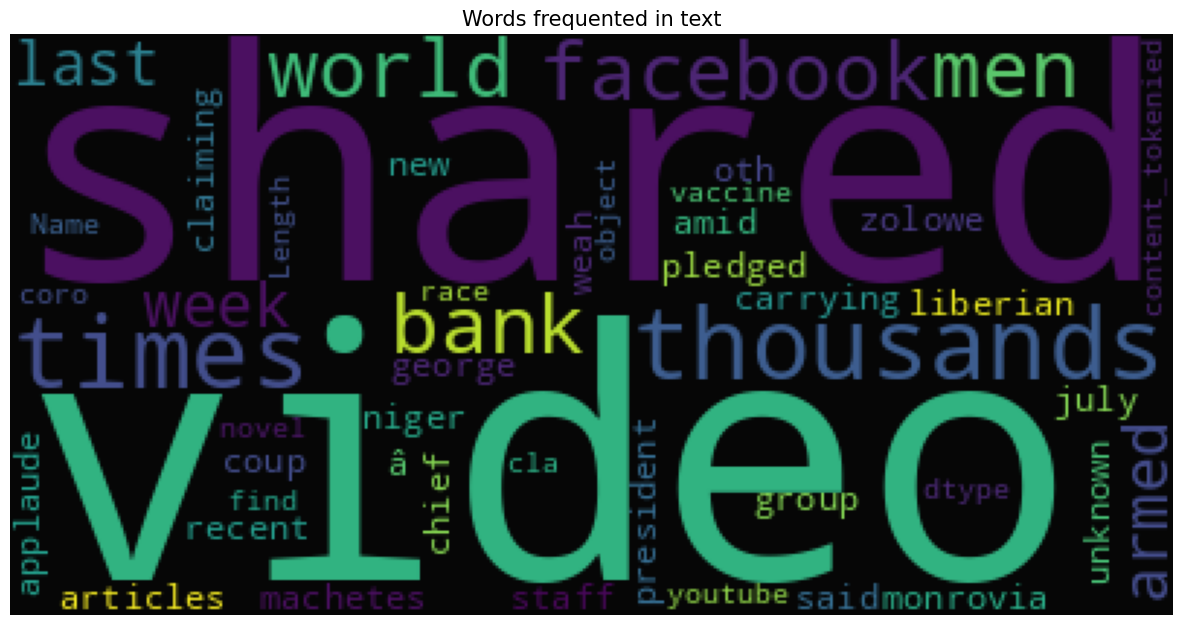

In [39]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        random_state=42).generate(str(df['content_tokenied']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

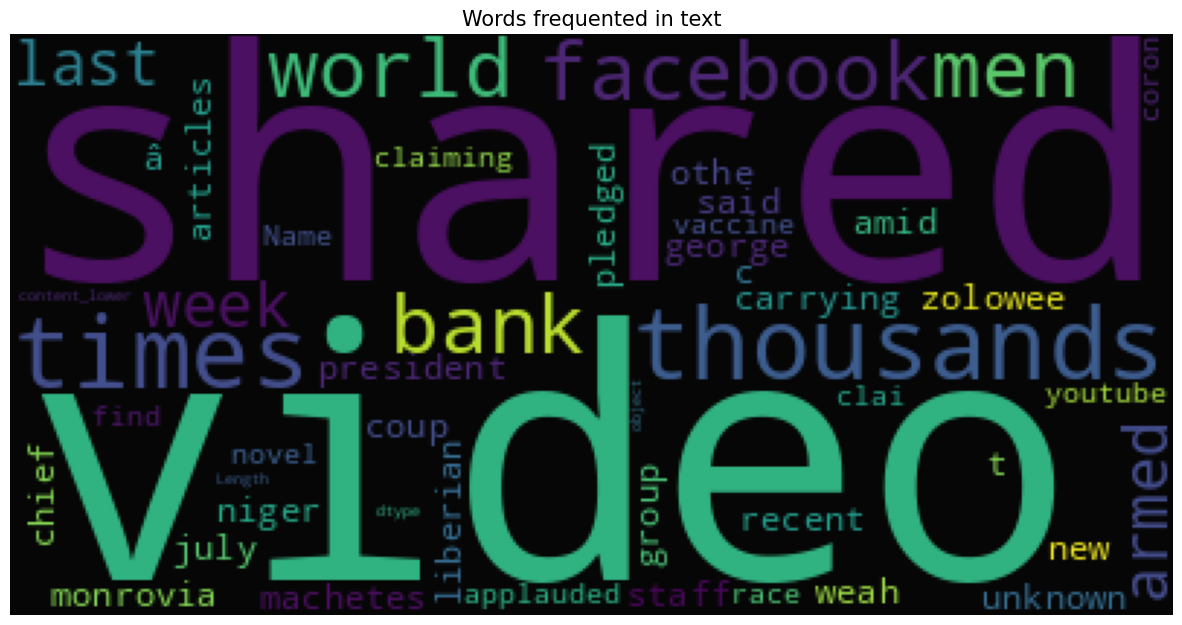

In [40]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        random_state=42).generate(str(df['content_lower']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

In [41]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))
df['content_lower'] = df['content_lower'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...


In [42]:
df['content_lower'] = df['content_lower'].apply(lambda x: x.replace("-lrb-", "("))
df['content_lower'] = df['content_lower'].apply(lambda x: x.replace("-rrb-", ")"))
df['content'] = df['content'].apply(lambda x: x.replace("-LRB-", "("))
df['content'] = df['content'].apply(lambda x: x.replace("-RRB-", ")"))
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...


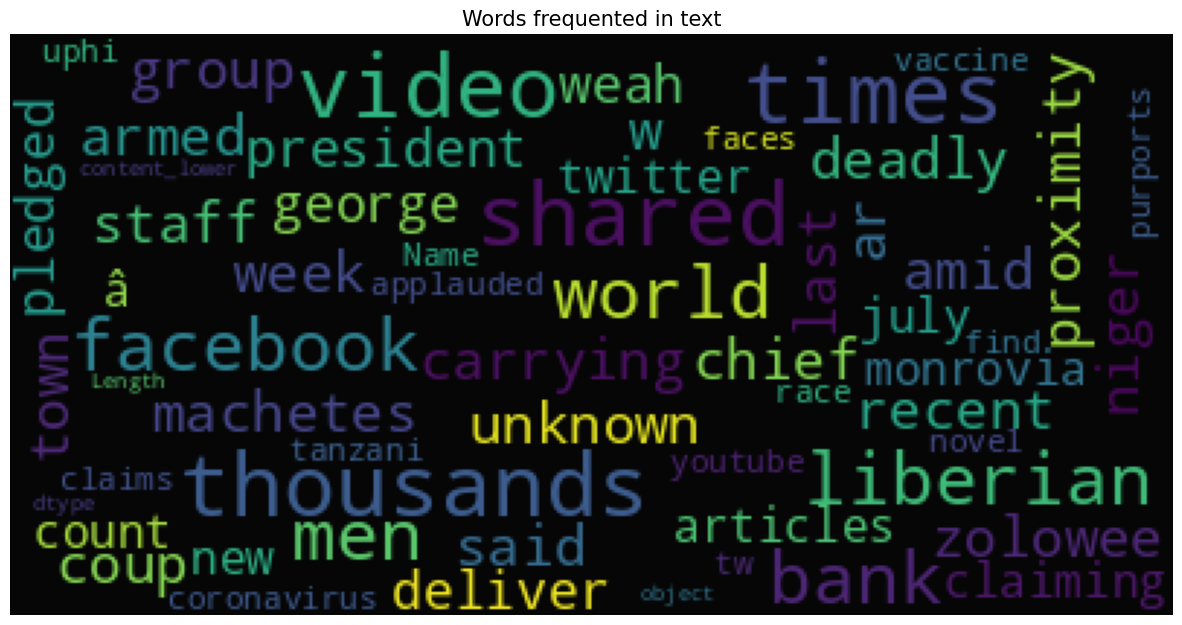

In [43]:
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        max_font_size=30,
                        random_state=42).generate(str(df['content_lower']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

In [44]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['content_contradict']=df['content_lower'].apply(lambda x:expand_contractions(str(x)))

In [45]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...


In [46]:
df['content_nodigit']=df['content_lower'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

In [47]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...


In [48]:
# Let's see how our data looks

for index,text in enumerate(df['content_nodigit'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 sources within leadership arcelormittal liberia hinted construction phase companyâ€™s mega ore processor created  direct indirect jobs yekepa nimba county global steel giant arcelormittal constructing modern concentrator add impetus quality ore shipped liberia arcelormittal liberia building highgrade concentrate requires approximately  million tons annually raw ore produce  million tons concentrated product will add quality liberian export ore company said new investment concentrator commitment mining sustainable manner remains longterm partnership communities government people liberia construction phase alone company hired local contractors amasses workforce  people reporter visited construction site near yekepa nimba county saw dozens men women work reported ore concentrator moving fast towards completion according reporter many local contractors working plant liberians acquiring new skills technology arcelormittal imported country late last year arcelormittal announced ph

# In this section, we’ll do the following things:

* Stopwords Removal
* Lemmatization
* Create Document Term Matrix

In [49]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['content_nodigit'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [50]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized
0,\nGovernment Must Provide Security for AML in ...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...
1,\nLiberia Army Chief Of Staff Predicts Unfores...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...
2,"\nGuns & Machetes: Men Attack, Vandalize Arcel...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...
3,\nPresident Weah commits to delivering violen...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...
4,\nNew World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m..."


In [51]:
df['title'] = df ['title'].apply(lambda x: str(x).replace('\n', ''))

In [52]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized
0,Government Must Provide Security for AML in th...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...
1,Liberia Army Chief Of Staff Predicts Unforesee...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...
2,"Guns & Machetes: Men Attack, Vandalize Arcelor...","A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...
3,President Weah commits to delivering violent ...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...
4,New World Bank Liberia Country Manager Arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m..."


In [53]:
df = df.dropna(subset=['title'])

In [54]:
def clean_title(text):

  # Remove special characters and punctuation
  text = re.sub('[^a-zA-Z0-9\s]', '', text)
  # Convert all text to lowercase
  text = text.lower()
  return text

df['title'] = df['title'].apply(clean_title)

In [55]:
df['title'].head(20)

0     government must provide security for aml in th...
1     liberia army chief of staff predicts unforesee...
2     guns  machetes men attack vandalize arcelormit...
3     president  weah commits to delivering violent ...
4        new world bank liberia country manager arrives
5     what cpp government will do differently  cummi...
6     weah says liberias best days yet to come as he...
7     police arrests woman who brutally assaulted an...
8     nec declares campaign open on saturday as 20 p...
9     campaign opens today candidates will do all to...
10              anticorruption campaigners escape death
11    african development bank and government of lib...
12    court fines spoon networks employees us300 eac...
13    election check three claims about president ge...
14    arcelormittal liberia graduates eight addition...
15    fido makes generous donation to disadvantaged ...
16    making our independence much more meaningful  ...
17    chief zanzan karwah finally gives his life

In [56]:
df_grouped=df[['title','lemmatized']].groupby(by='title').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
title,
,arcelormittal liberia commenced process operat...
\t\t\tas dozens rush for jobs at cdc headquarters liberians throw out warning to presidentelect \t\t,victory liberiaâ€ ™ s presidentelect decembe...
,lewis s tehnbsp economic freedom fighter liber...
complete with appropriate safety and lighting facilities,project national significance end
completely premature,lincoln g petersnbsp liberiaâ€ ™ s supreme cou...


In [57]:
# # Creating Document Term Matrix
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(analyzer='word')
# data=cv.fit_transform(df_grouped['lemmatized'])
# df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
# df_dtm.index=df_grouped.index
# df_dtm.head(3)

In [58]:
# # Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
# from wordcloud import WordCloud
# from textwrap import wrap

# # Function for generating word clouds
# def generate_wordcloud(data,title):
#   wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
#   plt.figure(figsize=(10,8))
#   plt.imshow(wc, interpolation='bilinear')
#   plt.axis("off")
#   plt.title('\n'.join(wrap(title,60)),fontsize=13)
#   plt.show()

# # Transposing document term matrix
# df_dtm=df_dtm.transpose()

# # Plotting word cloud for each product
# for index,product in enumerate(df_dtm.columns):
#   generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [70]:
df = df.dropna(subset=['date'])

In [71]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized
0,government must provide security for aml in th...,"Last week, armed men carrying machetes deadly ...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...
1,liberia army chief of staff predicts unforesee...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28 00:00:00,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...
2,guns machetes men attack vandalize arcelormit...,"A group unknown men said Zolowee, town proximi...",2023-07-30 00:00:00,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...
3,president weah commits to delivering violent ...,"Liberian President, George Weah, pledged deliv...",2023-07-27 00:00:00,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...
4,new world bank liberia country manager arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31 00:00:00,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m..."


In [96]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime data type
df['day'] = df['date'].apply(lambda x: x.day if not pd.isnull(x) else np.nan)
df['month'] = df['date'].apply(lambda x: x.month if not pd.isnull(x) else np.nan)
df['year'] = df['date'].apply(lambda x: x.year if not pd.isnull(x) else np.nan)

In [97]:
df = df.dropna(subset=['day'])
df = df.dropna(subset=['month'])
df = df.dropna(subset=['year'])

In [98]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized,day,month,year
0,government must provide security for aml in th...,"Last week, armed men carrying machetes deadly ...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...,31.0,7.0,2023.0
1,liberia army chief of staff predicts unforesee...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,28.0,7.0,2023.0
2,guns machetes men attack vandalize arcelormit...,"A group unknown men said Zolowee, town proximi...",2023-07-30,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...,30.0,7.0,2023.0
3,president weah commits to delivering violent ...,"Liberian President, George Weah, pledged deliv...",2023-07-27,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...,27.0,7.0,2023.0
4,new world bank liberia country manager arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m...",31.0,7.0,2023.0


In [100]:
df['day'] = df['day'].astype('int')
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')

In [101]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized,day,month,year
0,government must provide security for aml in th...,"Last week, armed men carrying machetes deadly ...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...,31,7,2023
1,liberia army chief of staff predicts unforesee...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,28,7,2023
2,guns machetes men attack vandalize arcelormit...,"A group unknown men said Zolowee, town proximi...",2023-07-30,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...,30,7,2023
3,president weah commits to delivering violent ...,"Liberian President, George Weah, pledged deliv...",2023-07-27,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...,27,7,2023
4,new world bank liberia country manager arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m...",31,7,2023


In [102]:
df['year'].min()

2011

In [103]:
df['year'].max()

2023

# Time-Wise Fake News Publication

In [110]:
df_fake = df[df['Label'] == 0.0]
df_fake.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized,day,month,year
27379,vodacom early careers 2021 internship applicat...,Posting Country: ZA Full Time / Part Time: Ful...,2020-07-08,NaN,http://whatsappgroup.com/2020/07/08/vodacom-ea...,0.0,Posting Country ZA Full Time Part Time Full T...,posting country za full time part time full ti...,[posting country za full time part time full ...,posting country za full time part time full ti...,posting country za full time part time full ti...,post country za time time time contract type p...,8,7,2020
27380,covid19 body mix up family buried a wrong body...,The Noda family Eastern Cape buried wrong body...,2020-07-04,NaN,http://whatsappgroup.com/2020/07/04/covid19-bo...,0.0,The Noda family in Eastern Cape buried a wrong...,noda family eastern cape buried wrong body thi...,[the noda family in eastern cape buried a wron...,noda family eastern cape buried wrong body thi...,noda family eastern cape buried wrong body thi...,noda family eastern cape bury wrong body think...,4,7,2020
27381,why vusiforpresident who is vusi thembekwayo r...,Why#VusiForPresident? Vusi Thembekwayo Liberia...,2020-07-04,NaN,http://whatsappgroup.com/2020/07/04/why-vusifo...,0.0,WhyVusiForPresident Vusi Thembekwayo is a Libe...,whyvusiforpresident vusi thembekwayo liberian ...,[whyvusiforpresident vusi thembekwayo is a lib...,whyvusiforpresident vusi thembekwayo liberian ...,whyvusiforpresident vusi thembekwayo liberian ...,whyvusiforpresident vusi thembekwayo liberian ...,4,7,2020
27382,post administration officer risk management re...,Directorate: Corporate Services SALARY : R257 ...,2020-07-01,NaN,http://whatsappgroup.com/2020/07/01/post-admin...,0.0,Directorate Corporate Services SALARY R257 50...,directorate corporate services salary r257 508...,[directorate corporate services salary r257 5...,directorate corporate services salary r257 508...,directorate corporate services salary – pe...,directorate corporate service salary – a...,1,7,2020
27383,post secretary to the clinical manager ref no ...,SALARY : USD173 703 per annum (plus benefits) ...,2020-07-01,NaN,http://whatsappgroup.com/2020/07/01/post-secre...,0.0,SALARY USD173 703 per annum plus benefits CEN...,salary usd173 703 per annum plus benefits cent...,[salary usd173 703 per annum plus benefits ce...,salary usd173 703 per annum plus benefits cent...,salary per annum plus benefits centre odi di...,salary annum plus benefit centre odi distri...,1,7,2020


**Year Wise Aggregation**

In [111]:
df_fake.groupby(['year'])['title'].agg('count').sort_values(ascending = False)

year
2020    3528
2021     549
2022     483
2019     437
2023     421
2018     158
2017      66
2016       3
Name: title, dtype: int64

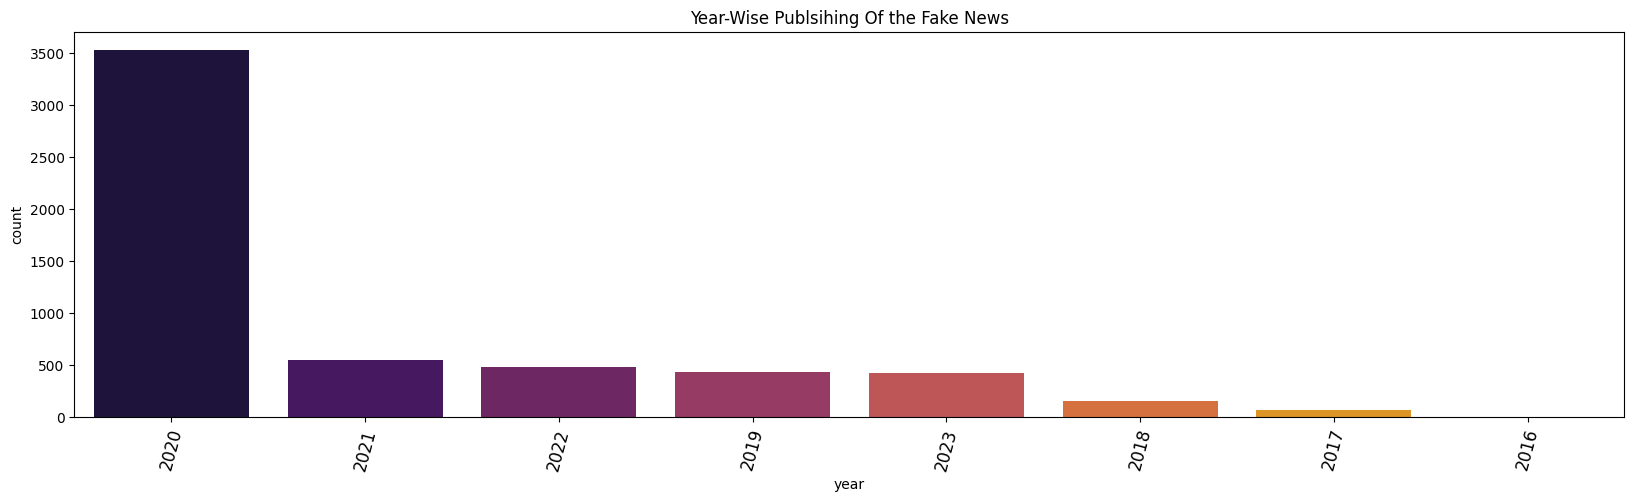

In [118]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "year", data = df_fake, order = df_fake['year'].value_counts().iloc[:12].index, palette = "inferno")
plt.title('Year-Wise Publsihing Of the Fake News')
plt.xticks(rotation = 75, fontsize = 12)
plt.show()

**Month Wise Aggregation**

In [112]:
df_fake.groupby(['month'])['title'].agg('count').sort_values(ascending = False)

month
3     1325
4     1140
5      684
2      530
6      396
1      305
9      305
7      256
8      255
10     197
11     155
12      97
Name: title, dtype: int64

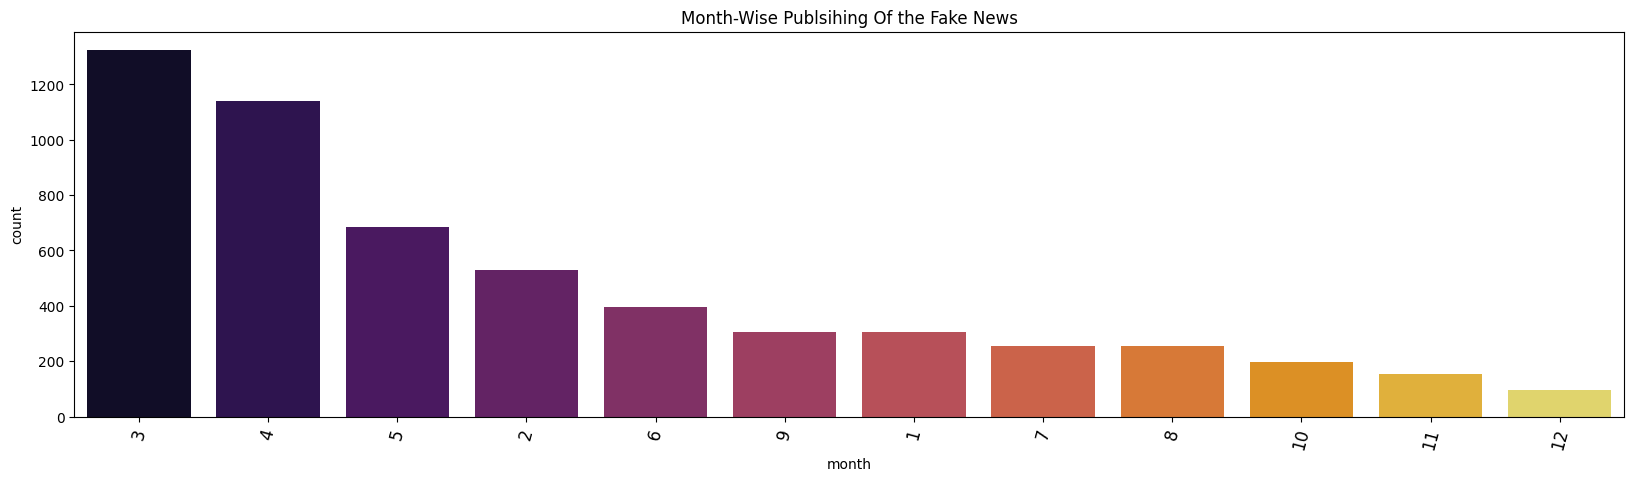

In [119]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "month", data = df_fake, order = df_fake['month'].value_counts().iloc[:12].index, palette = "inferno")
plt.title('Month-Wise Publsihing Of the Fake News')
plt.xticks(rotation = 75, fontsize = 12)
plt.show()

**Date Wise Aggregation**

In [120]:
df_fake.groupby(['day'])['title'].agg('count').sort_values(ascending = False)

day
3     225
27    218
2     211
4     203
5     199
22    198
23    195
24    194
28    194
17    194
29    193
19    192
16    190
20    190
13    188
26    186
9     186
6     186
7     184
11    181
14    178
25    176
18    173
8     165
15    164
21    158
1     155
30    154
12    153
10    153
31    109
Name: title, dtype: int64

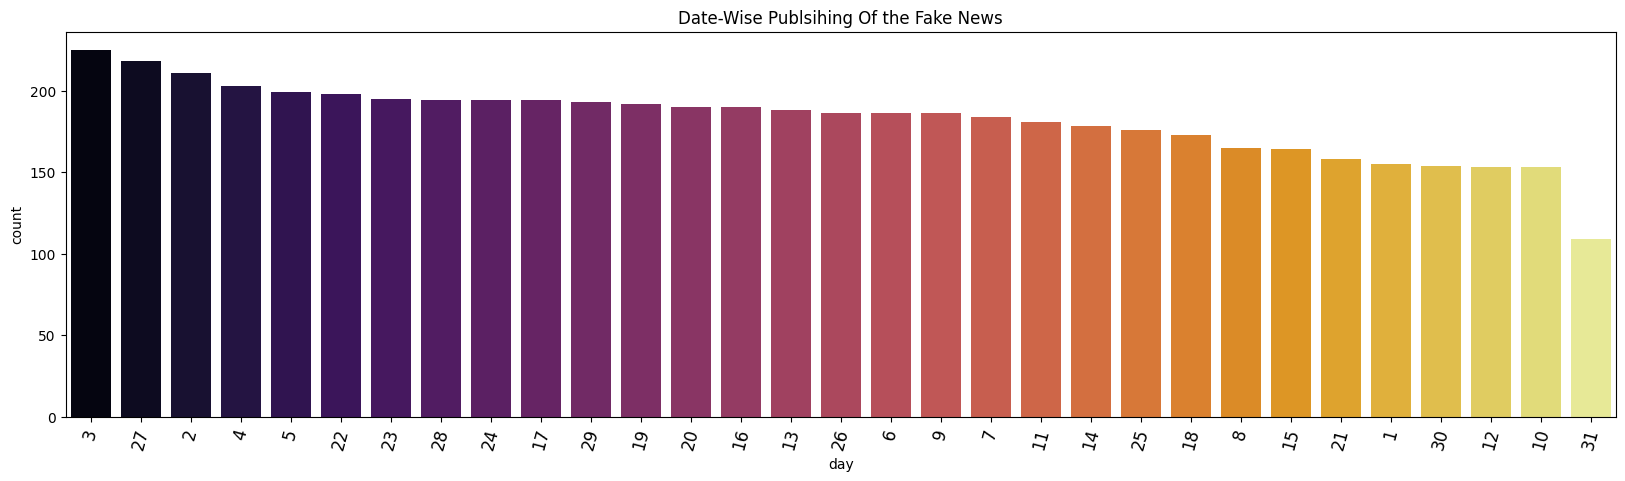

In [127]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "day", data = df_fake, order = df_fake['day'].value_counts().iloc[:31].index, palette = "inferno")
plt.title('Date-Wise Publsihing Of the Fake News')
plt.xticks(rotation = 75, fontsize = 12)
plt.show()

In [128]:
df.head()

,title,content,date,Publisher,link,Label,clean_content,content_lower,content_tokenied,content_contradict,content_nodigit,lemmatized,day,month,year
0,government must provide security for aml in th...,"Last week, armed men carrying machetes deadly ...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/government-must-provide...,1.0,Last week armed men carrying machetes and othe...,last week armed men carrying machetes deadly w...,[last week armed men carrying machetes and oth...,last week armed men carrying machetes deadly w...,last week armed men carrying machetes deadly w...,week armed man carry machete deadly weapon att...,31,7,2023
1,liberia army chief of staff predicts unforesee...,"Amid recent coup Niger, Chief Staff Liberian a...",2023-07-28,Gnn News Liberia,https://gnnliberia.com/liberia-army-chief-of-s...,1.0,Amid recent coup in Niger the Chief Staff of t...,amid recent coup niger chief staff liberian ar...,[amid recent coup in niger the chief staff of ...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,amid recent coup niger chief staff liberian ar...,28,7,2023
2,guns machetes men attack vandalize arcelormit...,"A group unknown men said Zolowee, town proximi...",2023-07-30,Gnn News Liberia,https://gnnliberia.com/guns-machetes-men-attac...,1.0,A group of unknown men said to be from Zolowee...,group unknown men said zolowee town proximity ...,[a group of unknown men said to be from zolowe...,group unknown men said zolowee town proximity ...,group unknown men said zolowee town proximity ...,group unknown man say zolowee town proximity a...,30,7,2023
3,president weah commits to delivering violent ...,"Liberian President, George Weah, pledged deliv...",2023-07-27,Gnn News Liberia,https://gnnliberia.com/president-weah-commits-...,1.0,Liberian President George Weah has pledged to ...,liberian president george weah pledged deliver...,[liberian president george weah has pledged to...,liberian president george weah pledged deliver...,liberian president george weah pledged deliver...,liberian president george weah pledge deliver ...,27,7,2023
4,new world bank liberia country manager arrives,"MONROVIA, July 31, 2023 â€“ The new World Bank...",2023-07-31,Gnn News Liberia,https://gnnliberia.com/new-world-bank-liberia-...,1.0,MONROVIA July 31 2023 â€“ The new World Bank C...,monrovia july 31 2023 â€“ new world bank count...,[monrovia july 31 2023 â€“ the new world bank ...,monrovia july 31 2023 â€“ new world bank count...,monrovia july â€“ new world bank country man...,"monrovia july â€ "" new world bank country m...",31,7,2023


**Publisher Wise**

In [130]:
df.Publisher.nunique()

32

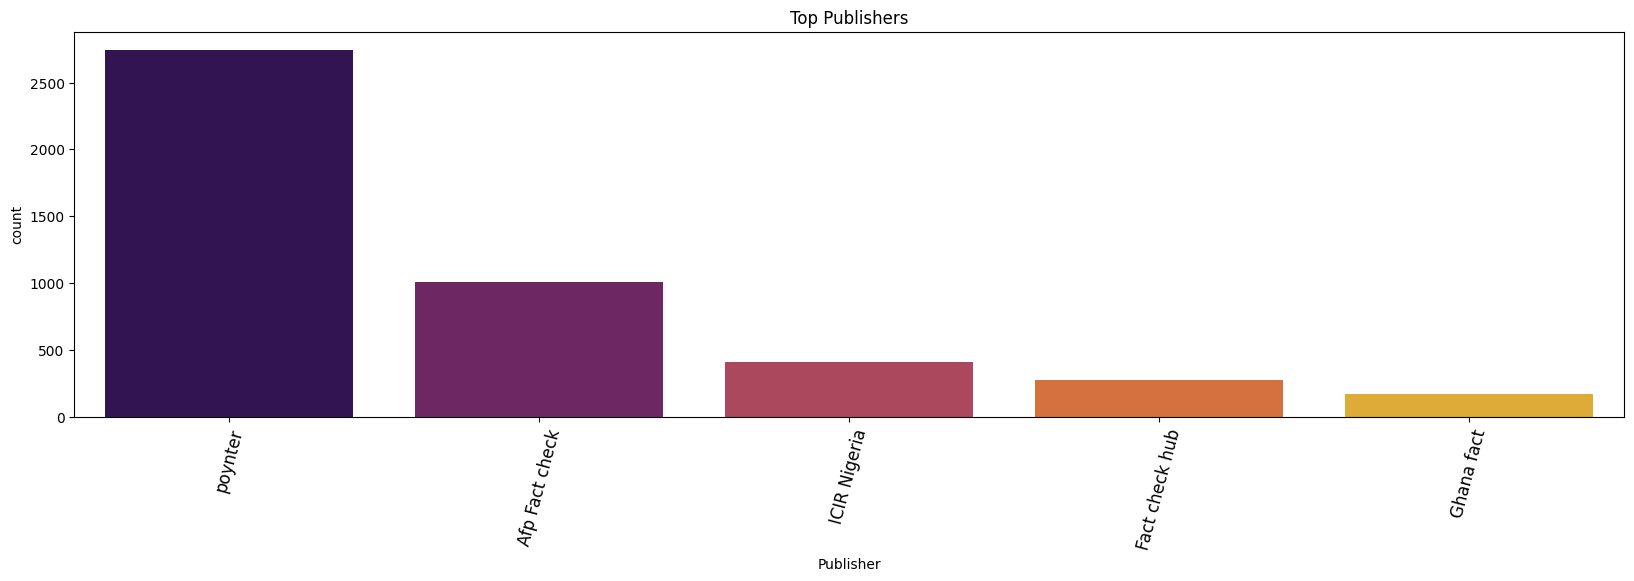

In [135]:
plt.figure(figsize=(20,5))

sns.countplot(x = "Publisher", data = df_fake,
              order = df_fake['Publisher'].value_counts().iloc[:5].index, palette = "inferno")
plt.title("Top Publishers")
plt.xticks(rotation = 75,fontsize = 12)
plt.show()

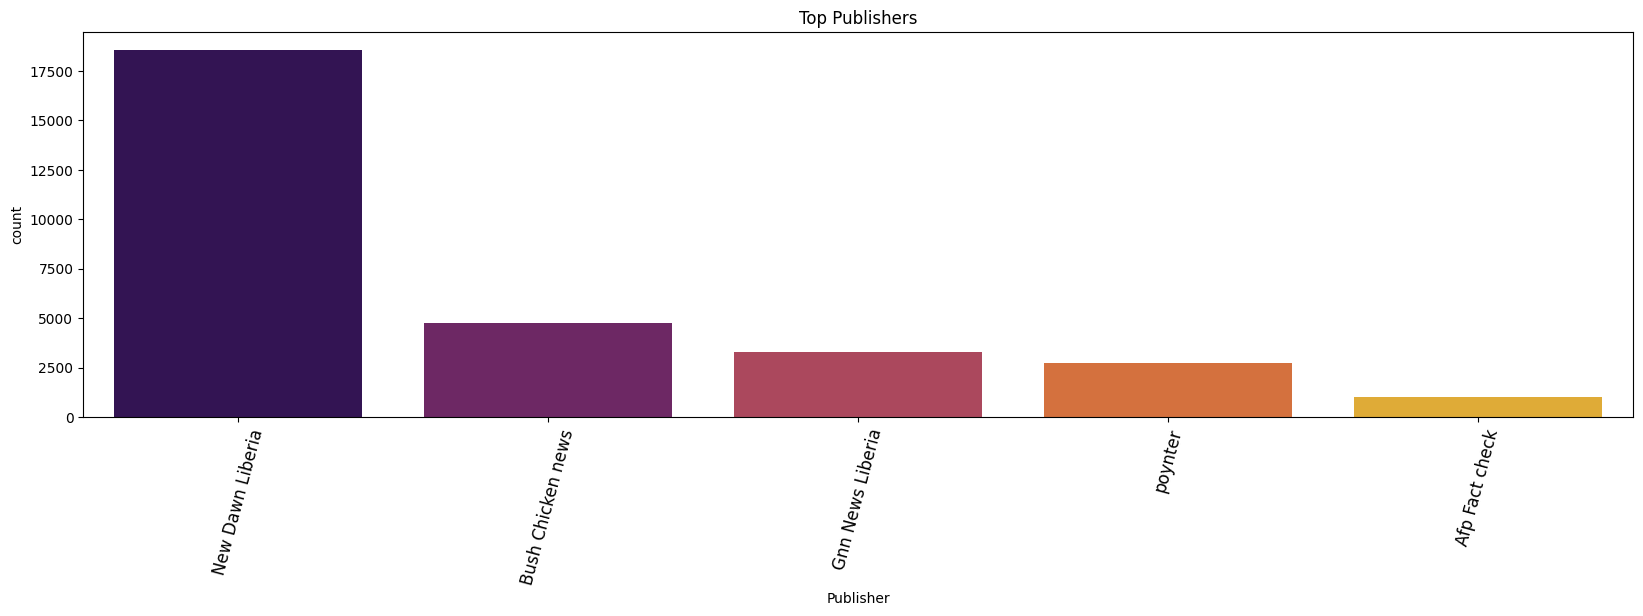

In [136]:
# Overall Publisher
plt.figure(figsize=(20,5))

sns.countplot(x = "Publisher", data = df,
              order = df['Publisher'].value_counts().iloc[:5].index, palette = "inferno")
plt.title("Top Publishers")
plt.xticks(rotation = 75,fontsize = 12)
plt.show()

In [137]:
df_fake.groupby(['Publisher'])['title'].agg('count').sort_values(ascending = False)

Publisher
poynter                    2743
Afp Fact check             1011
ICIR Nigeria                408
Fact check hub              272
Ghana fact                  170
snopes                      102
Dubawa                       50
The Stage Media-Liberia      36
Mark Mengonfia               11
Bettie Johnson-Mbayo          9
R. Joyclyn Wea                8
Maima Wright                  3
Gloria Wleh                   2
Hannah N. Geterminah          1
Name: title, dtype: int64

#### Fake News Some Insights

* Most Fake News are published by Publisher named `poynter`, even in the total publisher ranking it ranks 4th.
* `pornter` has 2743 fake articles.
* Maximum amount of fake news are published on 2nd, 27th and 3rd of the month March and April on the year 2000